In [18]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
import pandas.tseries.offsets as offsets

In [19]:
# 日立 Hitachi, Ltd.  (6501.JP)
stock_data = data.DataReader('6501.JP', 'stooq').sort_values('Date', ascending=True)

In [20]:
stock_data = stock_data.drop(["Open", "High", "Low", "Volume"], axis=1)
stock_data

,Close
Date,
2016-06-20,2306.7
2016-06-21,2316.5
2016-06-22,2287.6
2016-06-23,2371.4
2016-06-24,2127.4
...,...
2021-06-10,6073.0
2021-06-11,5983.0
2021-06-14,6032.0


<AxesSubplot:xlabel='Date'>

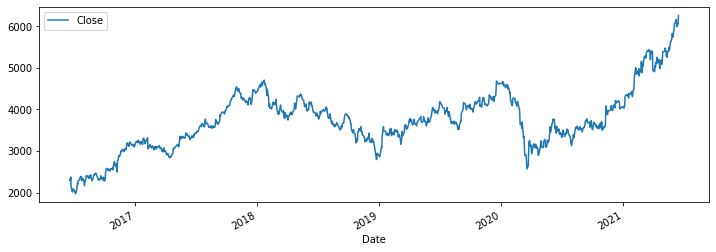

In [21]:
stock_data.plot(figsize=(12, 4))

In [22]:
# データの数値を-1から1の間に収める。　(データの正規化)
y = stock_data["Close"].values
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
y = torch.FloatTensor(y).view(-1)